# Reporte analítica de datos - Proyecto de Grado II

## Exploración de los datos para el municipio de BUGA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from pandas import DataFrame
from pandas import concat
from pandas.plotting import lag_plot
from statsmodels.tsa.ar_model import AutoReg

In [2]:
buga = pd.read_csv('../dengue_data/Buga.csv')
df = pd.DataFrame(buga)

df.head()

,Id,MesOcurrencia,FecNot,Semana,Ano,Edad,GrupoEdad,Sexo,Barrio,Comuna
0,156,enero,14/01/2010,1,2010,23,15 - 44,F,LA MERCED,4
1,157,enero,11/01/2010,1,2010,23,15 - 44,F,EL CARMELO,6
2,158,enero,10/01/2010,1,2010,20,15 - 44,M,EL CARMELO,6
3,161,enero,12/01/2010,1,2010,6,5 - 14,F,SUCRE,3
4,162,enero,07/01/2010,1,2010,13,5 - 14,M,POPULAR,5


### *Número de casos reportados por año*

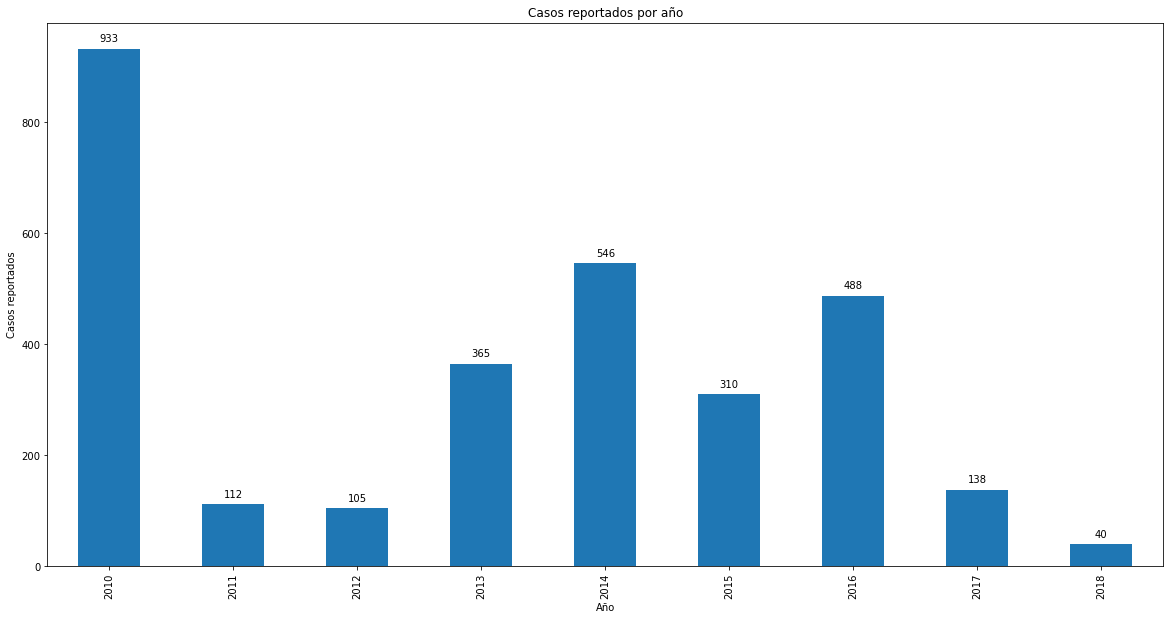

In [3]:
years = df['Ano'].value_counts().sort_index().plot(kind='bar', figsize=(20, 10))
years.set_xlabel('Año')
years.set_ylabel('Casos reportados')
years.set_title('Casos reportados por año')

for p in years.patches:
    years.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

### *Número de casos reportados por mes*

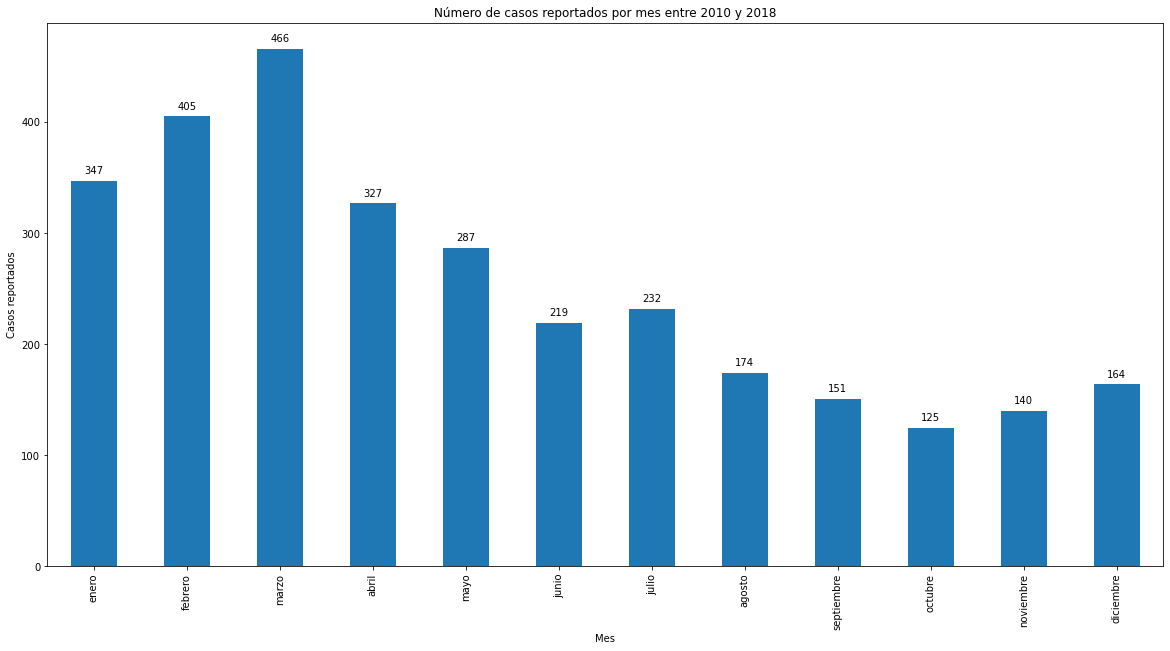

In [4]:
meses = ["enero", "febrero", "marzo", "abril", "mayo", "junio", 
          "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]
df['MesOcurrencia'] = pd.Categorical(df['MesOcurrencia'], categories=meses, ordered=True)
df.sort_values(by="MesOcurrencia")

months = df['MesOcurrencia'].value_counts().sort_index().plot(kind='bar', figsize=(20, 10))
months.set_xlabel('Mes')
months.set_ylabel('Casos reportados')
months.set_title('Número de casos reportados por mes entre 2010 y 2018')

for p in months.patches:
    months.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

Text(0.5, 1.0, 'Número de casos reportados por mes y año')

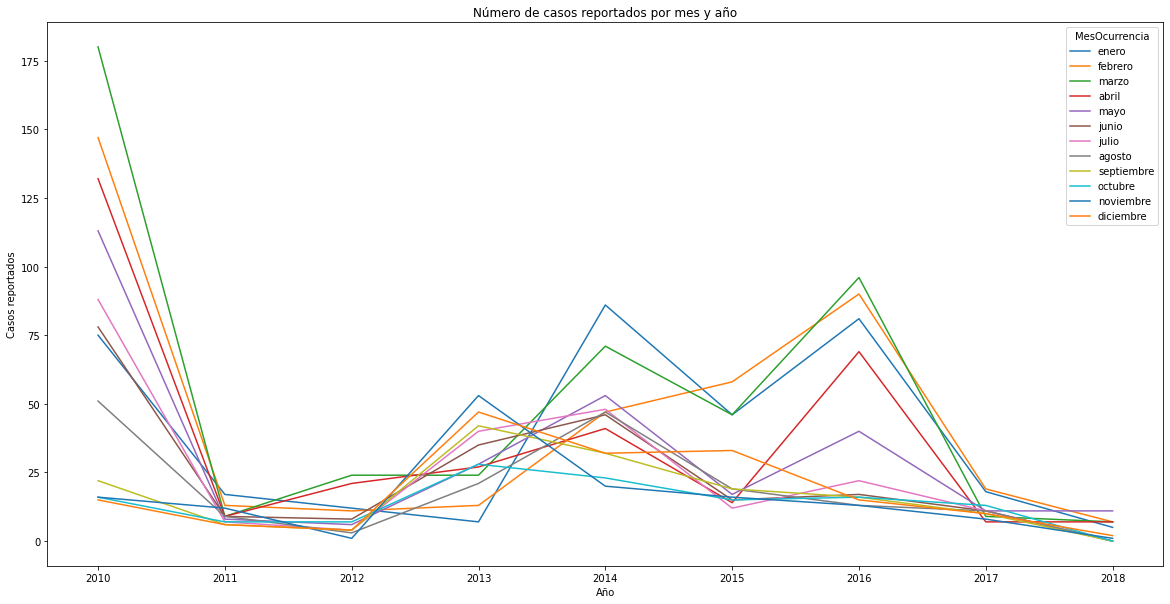

In [5]:
months = buga.groupby(["Ano", 'MesOcurrencia']).size().unstack(level=1).plot(kind='line', figsize=(20,10))
months.set_xlabel('Año')
months.set_ylabel('Casos reportados')
months.set_title('Número de casos reportados por mes y año')

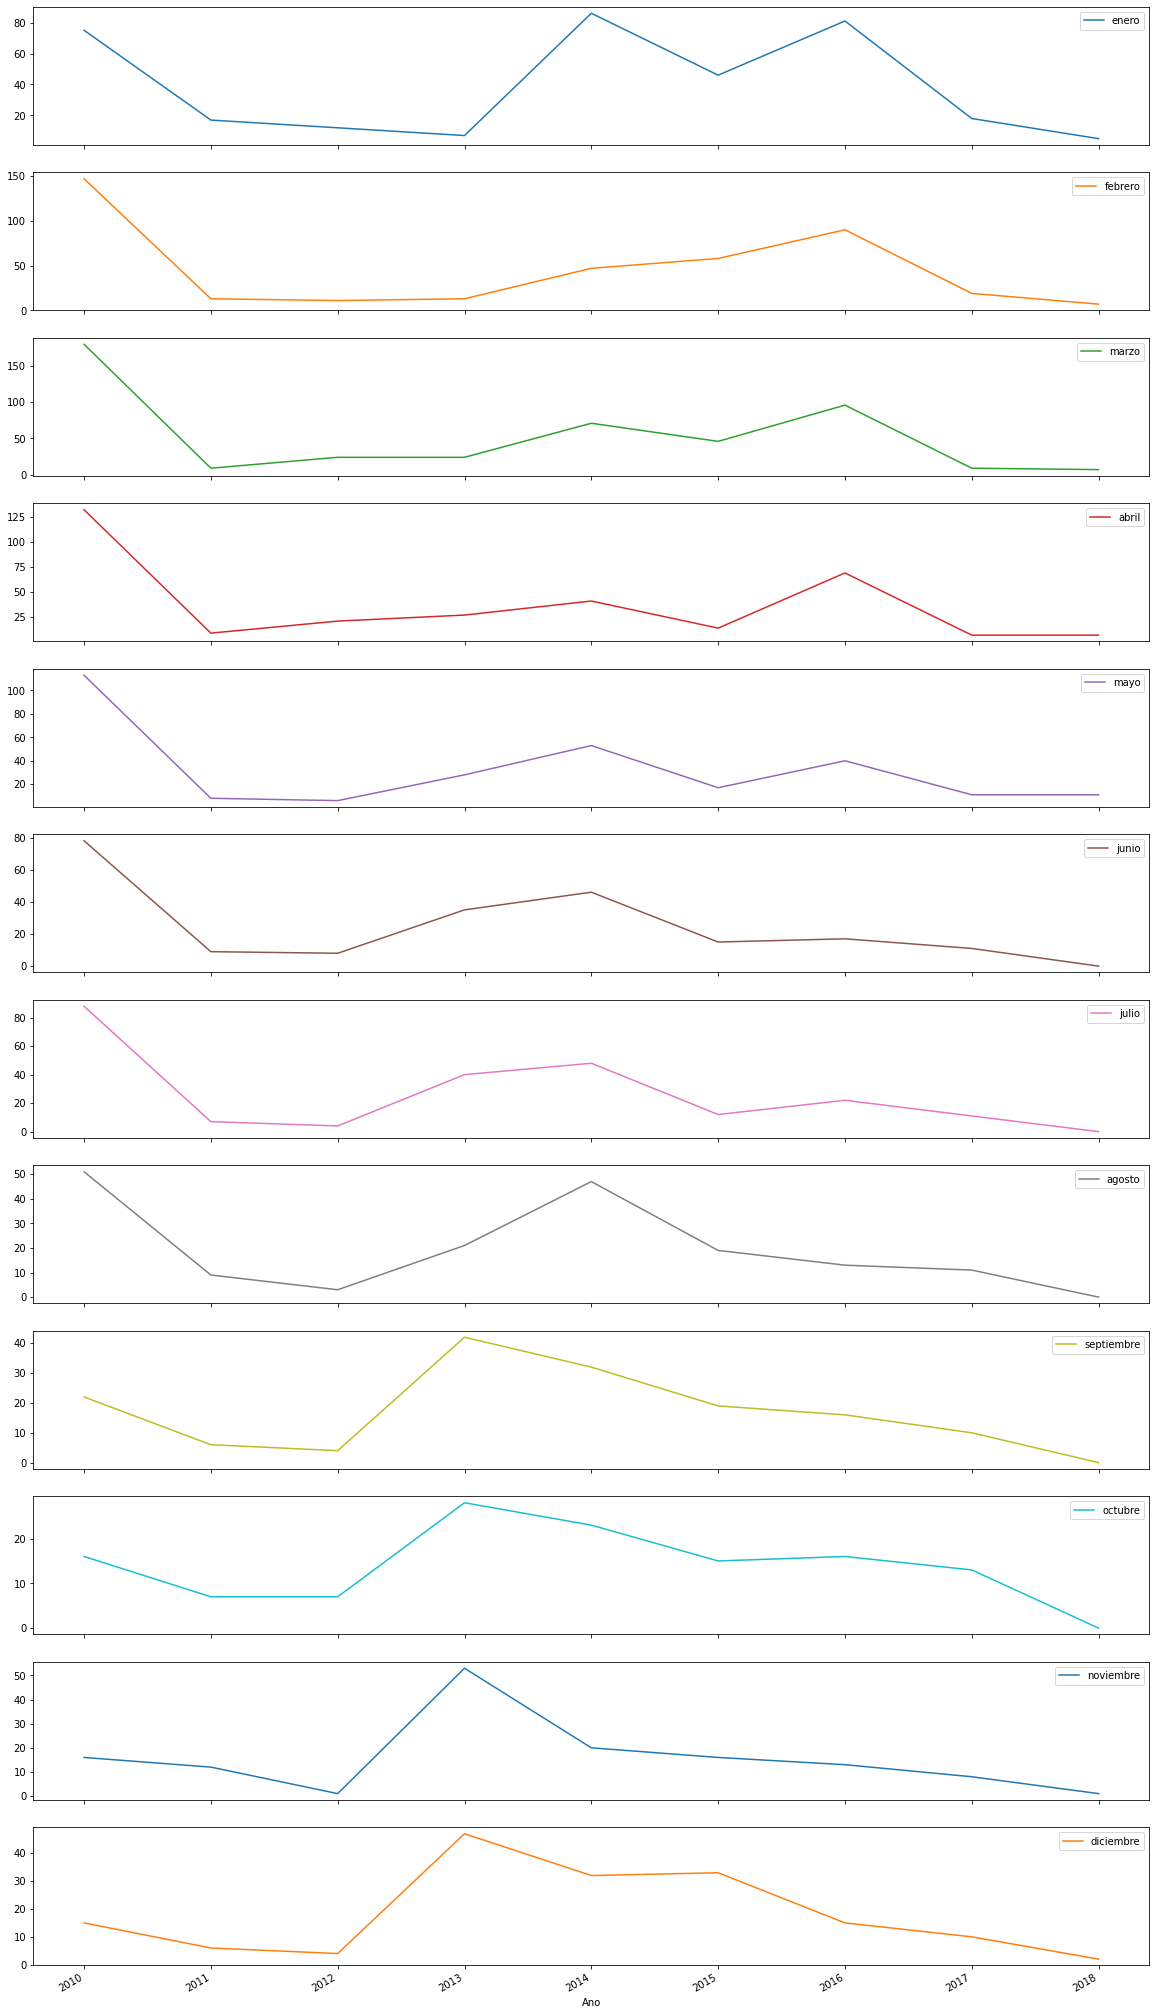

In [6]:
months = buga.groupby(["Ano", 'MesOcurrencia']).size().unstack(level=1).plot(kind='line', figsize=(20,40), subplots=True)


### *Número de casos reportados por sexo*

Text(0.5, 1.0, 'Porcentaje de casos reportados por sexo desde el 2010 hasta el 2018')

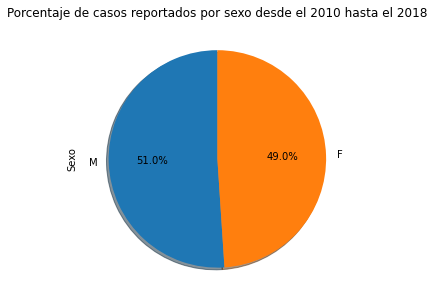

In [7]:
gender = df['Sexo'].value_counts().plot(kind='pie', shadow = True,startangle=90, figsize=(10,5), autopct='%1.1f%%')
gender.set_title("Porcentaje de casos reportados por sexo desde el 2010 hasta el 2018")

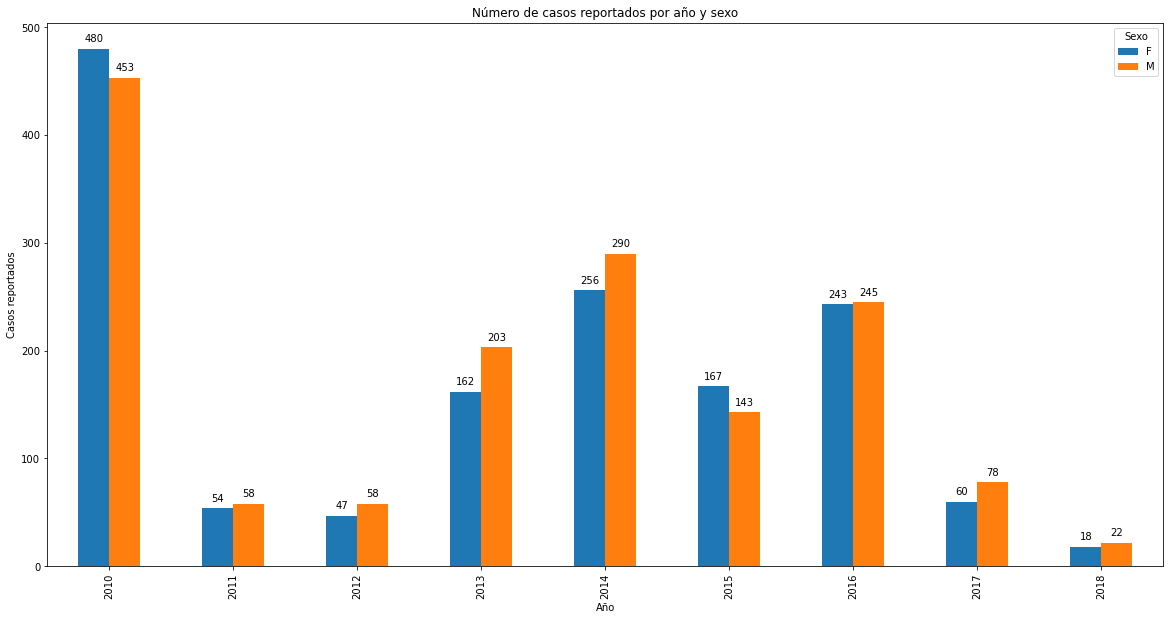

In [8]:
genders_by_year = buga.groupby(["Ano", 'Sexo']).size().unstack(level=1).plot(kind='bar', figsize=(20,10))

genders_by_year.set_xlabel('Año')
genders_by_year.set_ylabel('Casos reportados')
genders_by_year.set_title('Número de casos reportados por año y sexo')

for p in genders_by_year.patches:
    genders_by_year.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

### *Número de casos reportados por comuna*

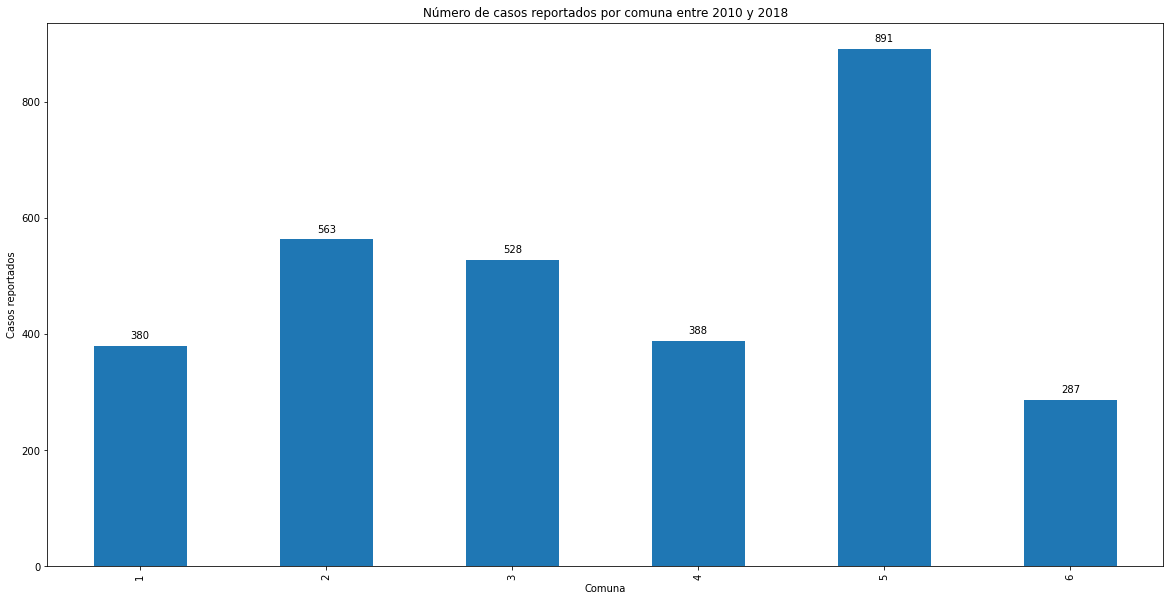

In [9]:
commune = df['Comuna'].value_counts().sort_index().plot(kind='bar', figsize=(20, 10))
commune.set_xlabel('Comuna')
commune.set_ylabel('Casos reportados')
commune.set_title('Número de casos reportados por comuna entre 2010 y 2018')

for p in commune.patches:
    commune.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

Text(0.5, 1.0, 'Número de casos reportados por año y comunas')

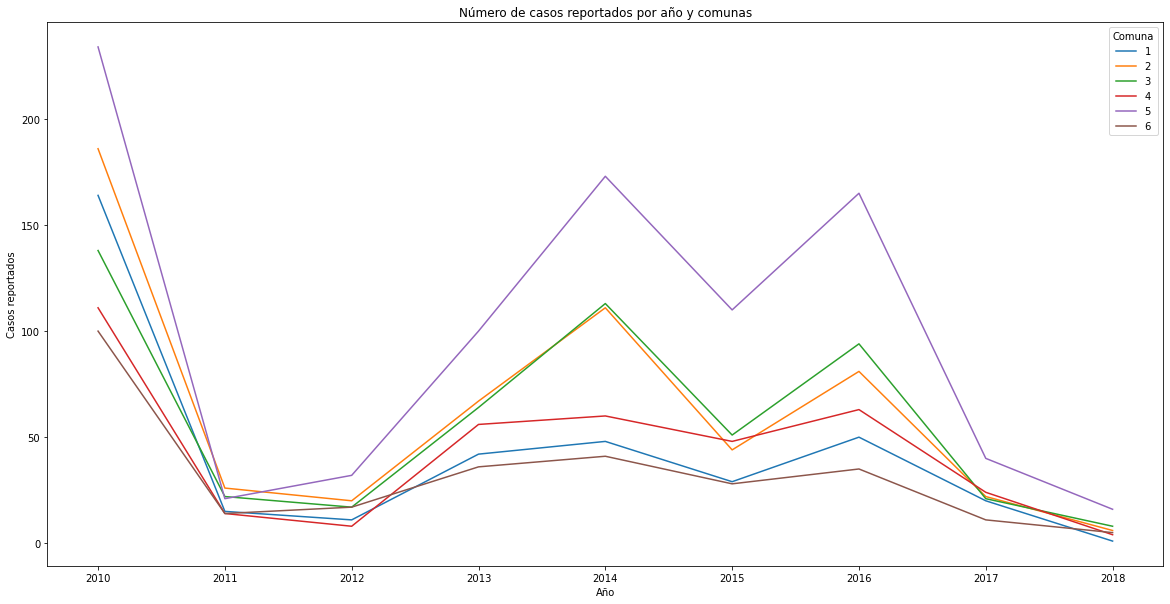

In [10]:
communes_by_year = buga.groupby(["Ano", 'Comuna']).size().unstack(level=1).plot(kind='line', figsize=(20,10))
communes_by_year.set_xlabel('Año')
communes_by_year.set_ylabel('Casos reportados')
communes_by_year.set_title('Número de casos reportados por año y comunas')

### *Número de casos reportados por barrio*

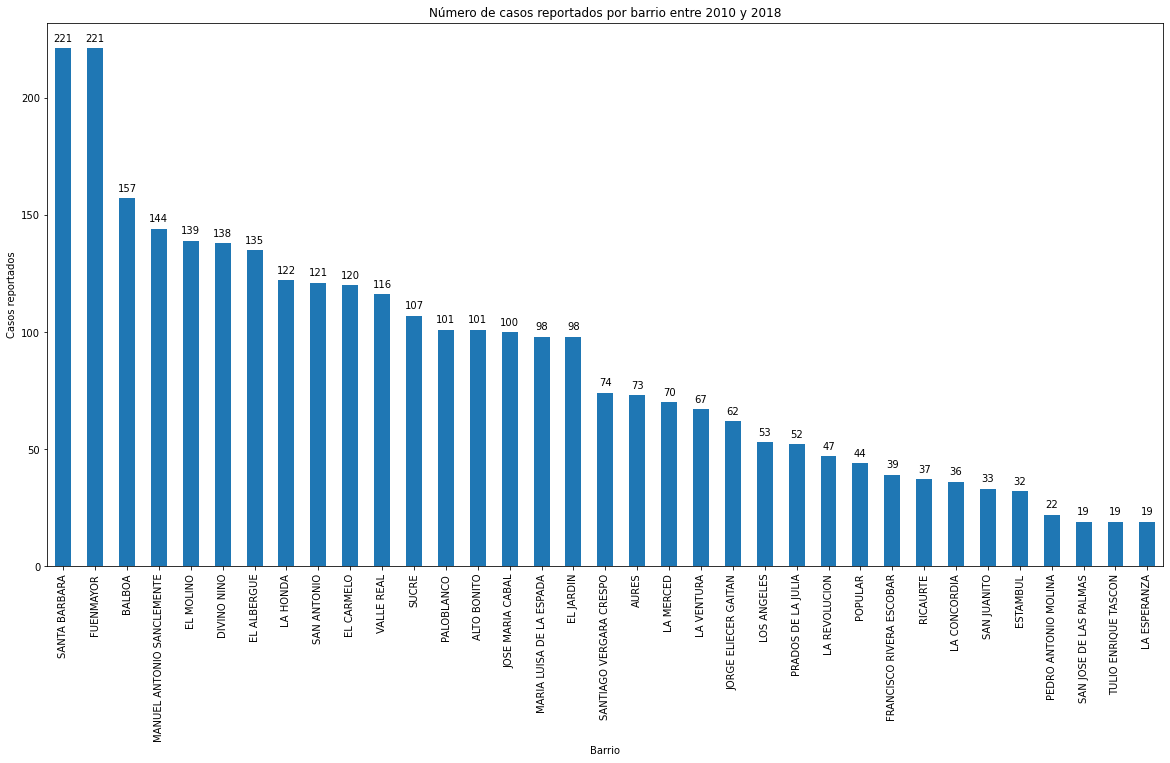

In [11]:
neighborhood = df['Barrio'].value_counts().plot(kind='bar', figsize=(20,10))
neighborhood.set_xlabel('Barrio')
neighborhood.set_ylabel('Casos reportados')
neighborhood.set_title('Número de casos reportados por barrio entre 2010 y 2018')

for p in neighborhood.patches:
    neighborhood.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

Text(0.5, 1.0, 'Número de casos reportados por año y barrio')

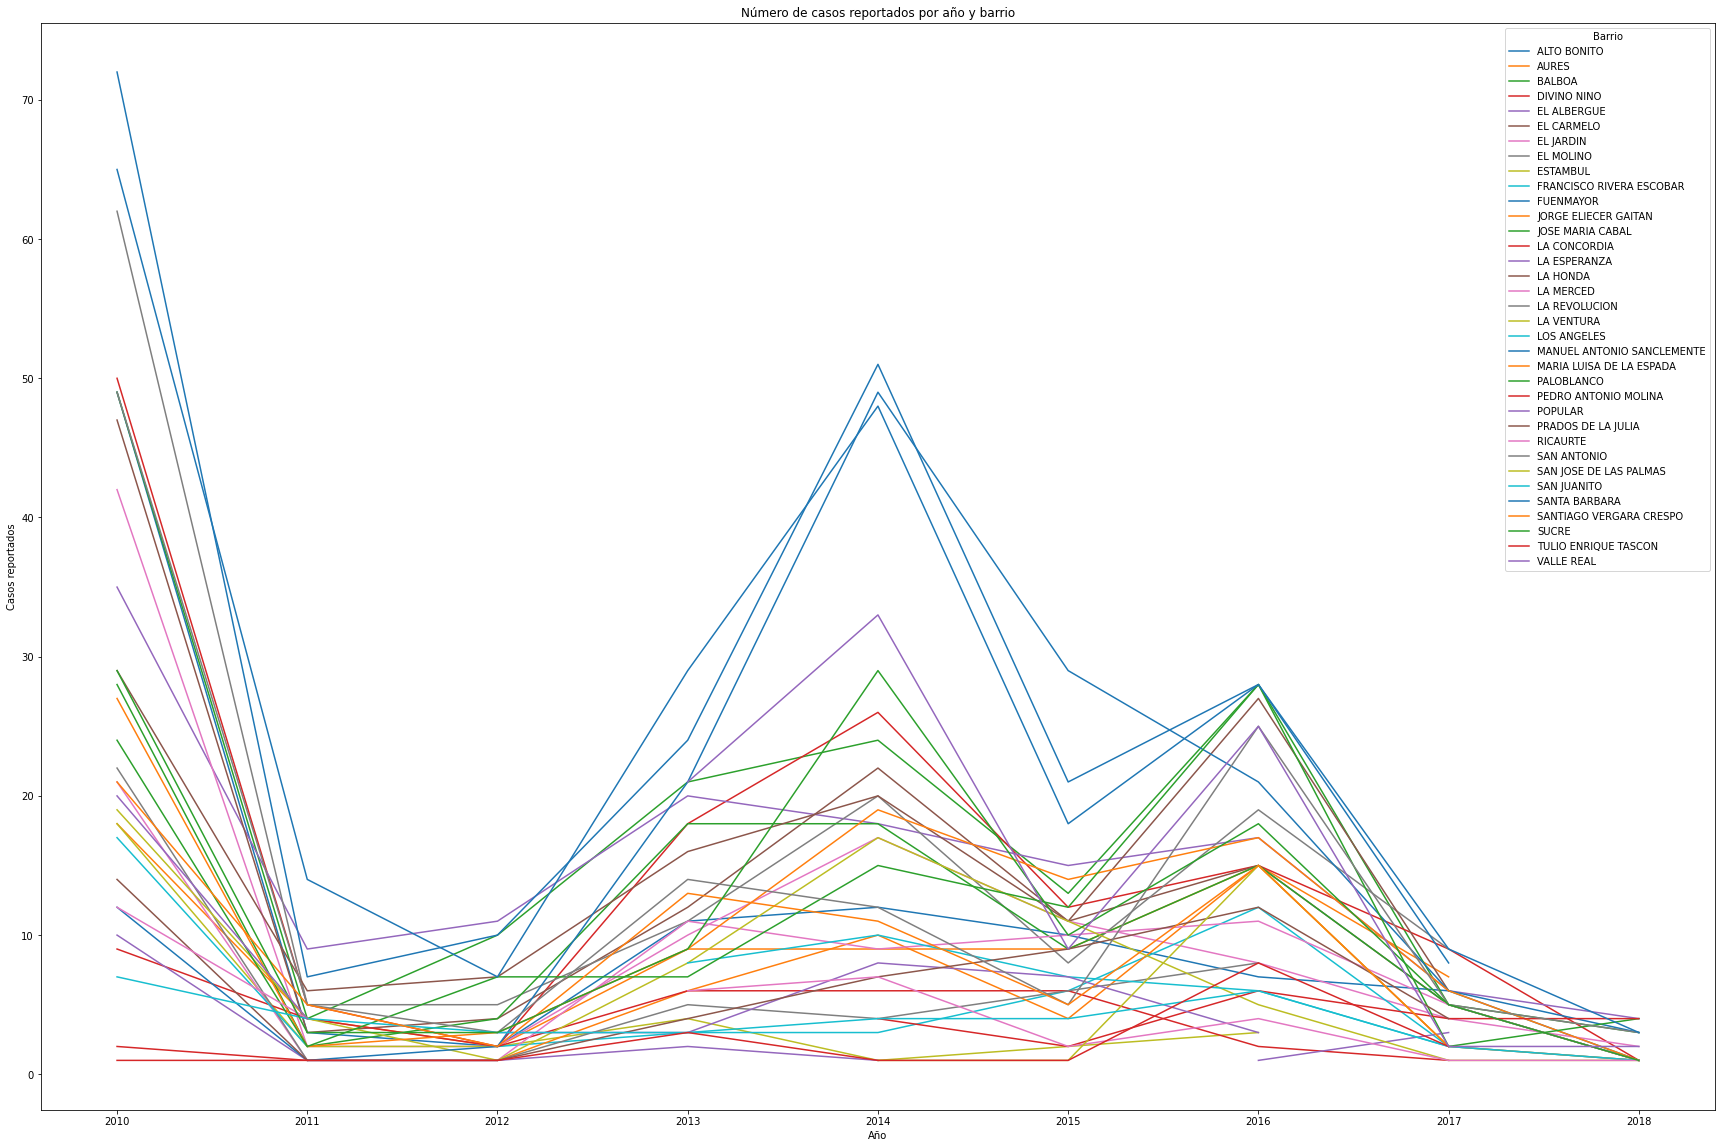

In [12]:
neighborhood_years = buga.groupby(["Ano", 'Barrio']).size().unstack(level=1).plot(kind='line', figsize=(30,20))
neighborhood_years.set_xlabel('Año')
neighborhood_years.set_ylabel('Casos reportados')
neighborhood_years.set_title('Número de casos reportados por año y barrio')

### *Número de casos reportados por rango de edad*

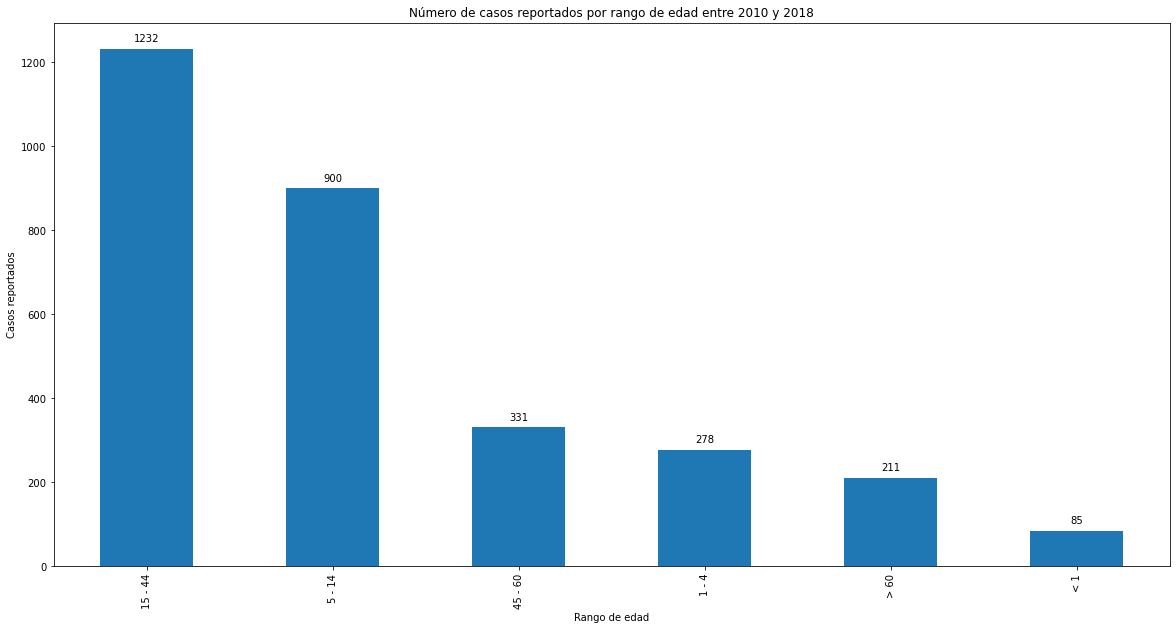

In [13]:
age_range = df['GrupoEdad'].value_counts().plot(kind='bar', figsize=(20,10))
age_range.set_xlabel('Rango de edad')
age_range.set_ylabel('Casos reportados')
age_range.set_title('Número de casos reportados por rango de edad entre 2010 y 2018')

for p in age_range.patches:
    age_range.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

Text(0.5, 1.0, 'Número de casos reportados por año y rango de edad')

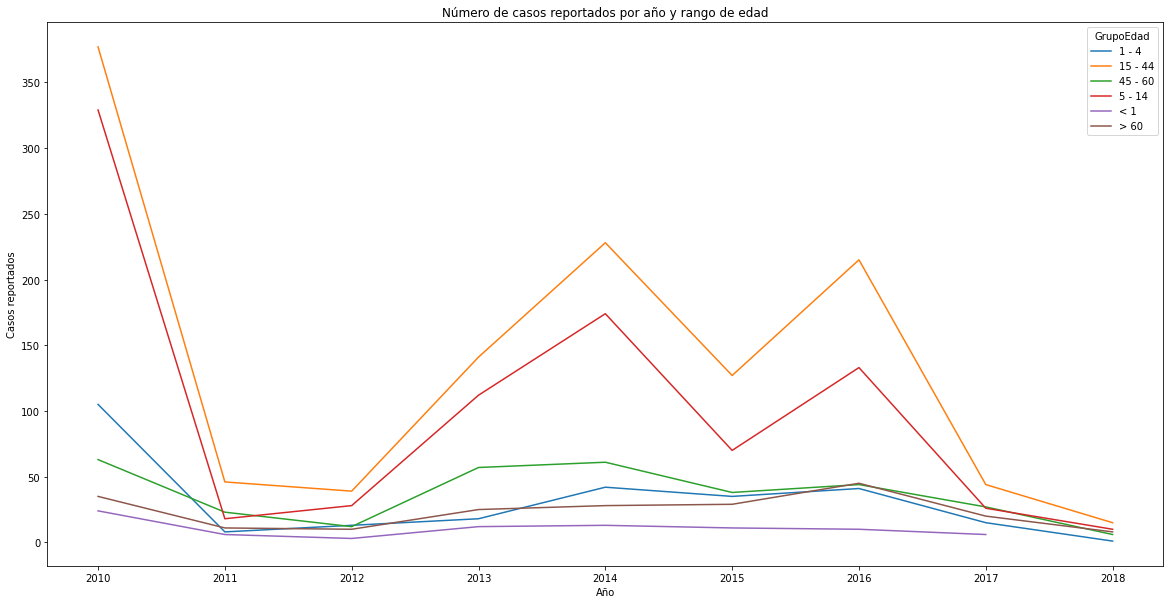

In [14]:
age_by_year = buga.groupby(["Ano", 'GrupoEdad']).size().unstack(level=1).plot(kind='line', figsize=(20,10))

age_by_year.set_xlabel('Año')
age_by_year.set_ylabel('Casos reportados')
age_by_year.set_title('Número de casos reportados por año y rango de edad')

### Número de casos por día durante los años 2010 - 2018

Text(0.5, 1.0, 'Casos reportados por día')

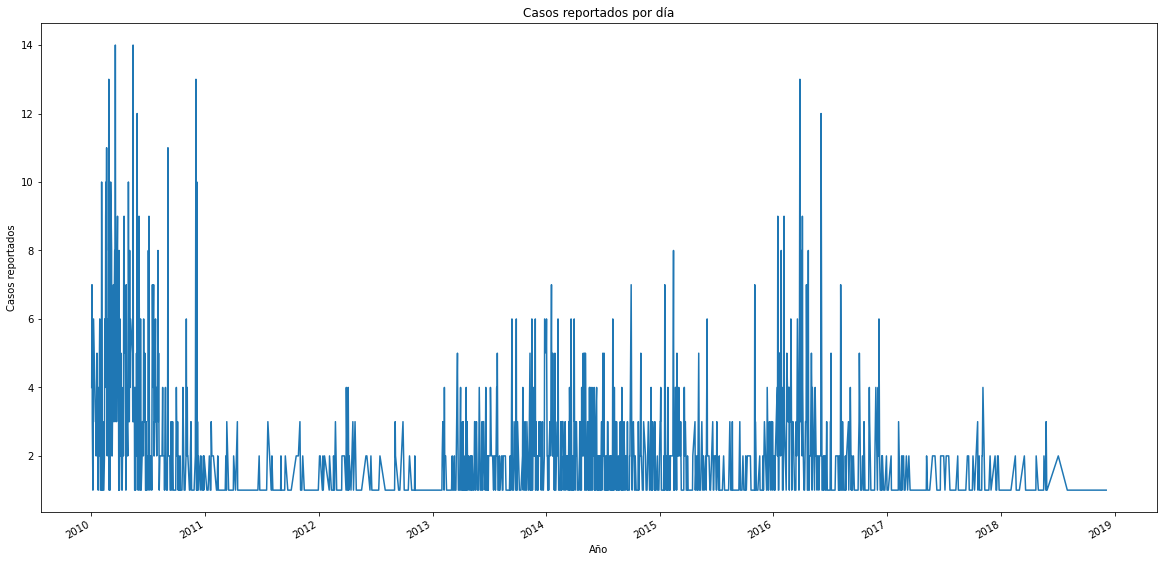

In [15]:
df["FecNot"]=pd.to_datetime(df['FecNot'])
df.sort_values(["FecNot"])
days = df['FecNot'].value_counts().plot(kind='line', figsize=(20, 10))
days.set_xlabel('Año')
days.set_ylabel('Casos reportados')
days.set_title('Casos reportados por día')

## ANÁLISIS DE SERIES DE TIEMPO

### *Pruebas de hipóstesis para determinar si el modelo es estacional o no* | DICKEY-FULLER TEST

**Hipótesis nula:** La serie de tiempo no es estacional  
**Hipótesis del investigador:** La serie de tiempo es estacional

*Si el estadístico ADF < Valor crítico entonces rechazo la hipótesis nula*  
*Si el estadístico ADF > Valor crítico entonces acepto la hipótesis nula*

### POR AÑO

Estadístico ADF: -3.895058
p-value: 0.002072
Valor crítico:
	1%: -4.665
	5%: -3.367
	10%: -2.803
Rechazo Ho: La serie de tiempo es estacionaria


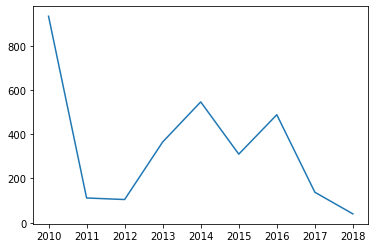

In [16]:
years = df['Ano'].value_counts().sort_index()
results = adfuller(years)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria")
    
df['Ano'].value_counts().sort_index().plot()
    

## Análisis por mes x año

### 2010

Estadístico ADF: -6.955980
p-value: 0.000000
Valor crítico:
	1%: -3.456
	5%: -2.873
	10%: -2.573
Rechazo Ho: La serie de tiempo es estacionaria


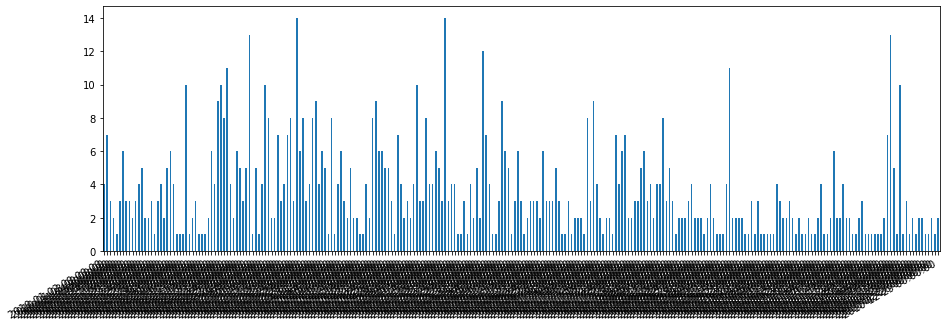

In [17]:
aux=df[df.Ano == 2010]
months = aux["FecNot"].value_counts().sort_index()

results = adfuller(months)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
    months.plot(kind='bar')
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria\n\nDebido a que la serie de tiempo no es estacionaria se procede a transformarla:\n")
    months = months.diff().dropna()
    results = adfuller(months)
    print('Estadístico ADF: %f' % results[0])
    print('p-value: %f' % results[1])
    print('Valor crítico:')
    for key,value in results[4].items():
        print('\t%s: %.3f'% (key,value))
    
    if results[0] < results[4]["5%"] :
        print("Rechazo Ho: La serie de tiempo es estacionaria")
    else :
        print("Acepta Ho: La serie de tiempo no es estacionaria")
    months.plot(kind='bar')

months.plot(figsize=(15,5))


### 2011

Estadístico ADF: -9.277524
p-value: 0.000000
Valor crítico:
	1%: -3.507
	5%: -2.895
	10%: -2.585
Rechazo Ho: La serie de tiempo es estacionaria


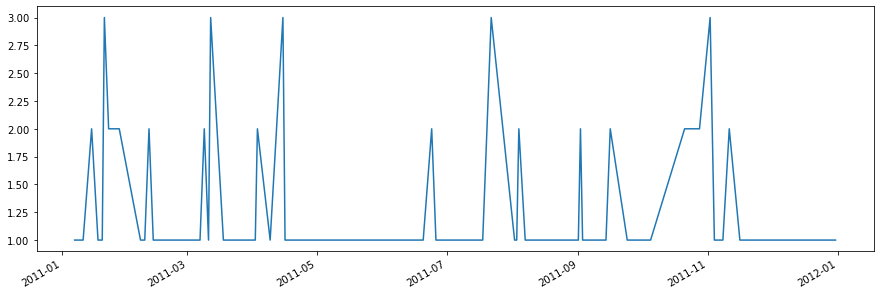

In [18]:
aux=df[df.Ano == 2011]
months = aux["FecNot"].value_counts().sort_index()

results = adfuller(months)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria\n\nDebido a que la serie de tiempo no es estacionaria se procede a transformarla:\n")
    months = months.diff().dropna()
    results = adfuller(months)
    print('Estadístico ADF: %f' % results[0])
    print('p-value: %f' % results[1])
    print('Valor crítico:')
    for key,value in results[4].items():
        print('\t%s: %.3f'% (key,value))
    
    if results[0] < results[4]["5%"] :
        print("Rechazo Ho: La serie de tiempo es estacionaria")
    else :
        print("Acepta Ho: La serie de tiempo no es estacionaria")
        
    months.plot(kind='bar')

months.plot(figsize=(15,5))

### 2012

Estadístico ADF: -3.084383
p-value: 0.027731
Valor crítico:
	1%: -3.534
	5%: -2.906
	10%: -2.591
Rechazo Ho: La serie de tiempo es estacionaria


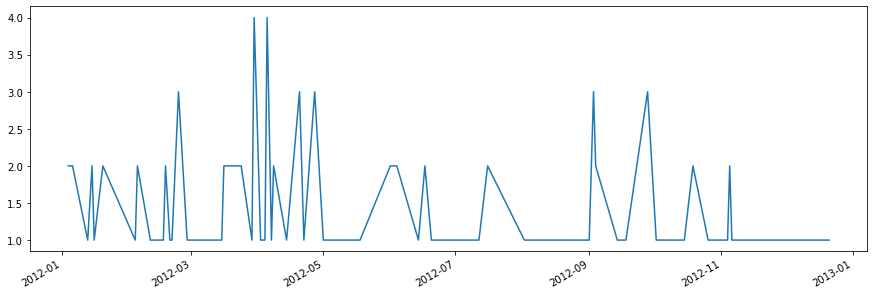

In [19]:
aux=df[df.Ano == 2012]
months = aux["FecNot"].value_counts().sort_index()

results = adfuller(months)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria\n\nDebido a que la serie de tiempo no es estacionaria se procede a transformarla:\n")
    months = months.diff().dropna()
    results = adfuller(months)
    print('Estadístico ADF: %f' % results[0])
    print('p-value: %f' % results[1])
    print('Valor crítico:')
    for key,value in results[4].items():
        print('\t%s: %.3f'% (key,value))
    
    if results[0] < results[4]["5%"] :
        print("Rechazo Ho: La serie de tiempo es estacionaria")
    else :
        print("Acepta Ho: La serie de tiempo no es estacionaria")
        
    months.plot(kind='bar')

months.plot(figsize=(15,5))

### 2014

Estadístico ADF: -14.687088
p-value: 0.000000
Valor crítico:
	1%: -3.456
	5%: -2.873
	10%: -2.573
Rechazo Ho: La serie de tiempo es estacionaria


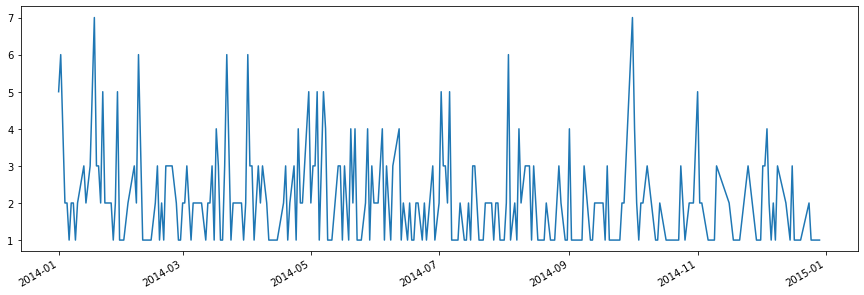

In [20]:
aux=df[df.Ano == 2014]
months = aux["FecNot"].value_counts().sort_index()

results = adfuller(months)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria\n\nDebido a que la serie de tiempo no es estacionaria se procede a transformarla:\n")
    months = months.diff().dropna()
    results = adfuller(months)
    print('Estadístico ADF: %f' % results[0])
    print('p-value: %f' % results[1])
    print('Valor crítico:')
    for key,value in results[4].items():
        print('\t%s: %.3f'% (key,value))
    
    if results[0] < results[4]["5%"] :
        print("Rechazo Ho: La serie de tiempo es estacionaria")
    else :
        print("Acepta Ho: La serie de tiempo no es estacionaria")
        
    months.plot(kind='bar')

months.plot(figsize=(15,5))

### 2015

Estadístico ADF: -12.478518
p-value: 0.000000
Valor crítico:
	1%: -3.469
	5%: -2.879
	10%: -2.576
Rechazo Ho: La serie de tiempo es estacionaria


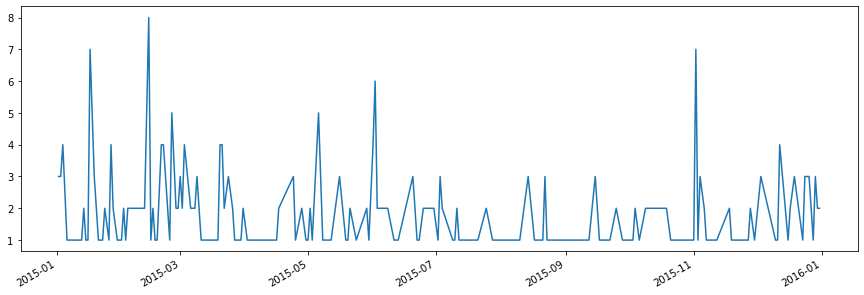

In [21]:
aux=df[df.Ano == 2015]
months = aux["FecNot"].value_counts().sort_index()

results = adfuller(months)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria\n\nDebido a que la serie de tiempo no es estacionaria se procede a transformarla:\n")
    months = months.diff().dropna()
    results = adfuller(months)
    print('Estadístico ADF: %f' % results[0])
    print('p-value: %f' % results[1])
    print('Valor crítico:')
    for key,value in results[4].items():
        print('\t%s: %.3f'% (key,value))
    
    if results[0] < results[4]["5%"] :
        print("Rechazo Ho: La serie de tiempo es estacionaria")
    else :
        print("Acepta Ho: La serie de tiempo no es estacionaria")
        
    months.plot(kind='bar')

months.plot(figsize=(15,5))

### 2016

Estadístico ADF: -12.112992
p-value: 0.000000
Valor crítico:
	1%: -3.464
	5%: -2.876
	10%: -2.575
Rechazo Ho: La serie de tiempo es estacionaria


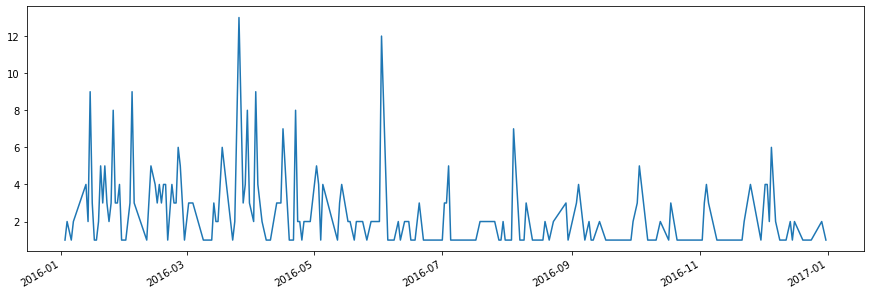

In [22]:
aux=df[df.Ano == 2016]
months = aux["FecNot"].value_counts().sort_index()



results = adfuller(months)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria\n\nDebido a que la serie de tiempo no es estacionaria se procede a transformarla:\n")
    months = months.diff().dropna()
    results = adfuller(months)
    print('Estadístico ADF: %f' % results[0])
    print('p-value: %f' % results[1])
    print('Valor crítico:')
    for key,value in results[4].items():
        print('\t%s: %.3f'% (key,value))
    
    if results[0] < results[4]["5%"] :
        print("Rechazo Ho: La serie de tiempo es estacionaria")
    else :
        print("Acepta Ho: La serie de tiempo no es estacionaria")
        
    months.plot(kind='bar')

months.plot(figsize=(15,5))

### 2017

Estadístico ADF: -2.943858
p-value: 0.040480
Valor crítico:
	1%: -3.501
	5%: -2.892
	10%: -2.583
Rechazo Ho: La serie de tiempo es estacionaria


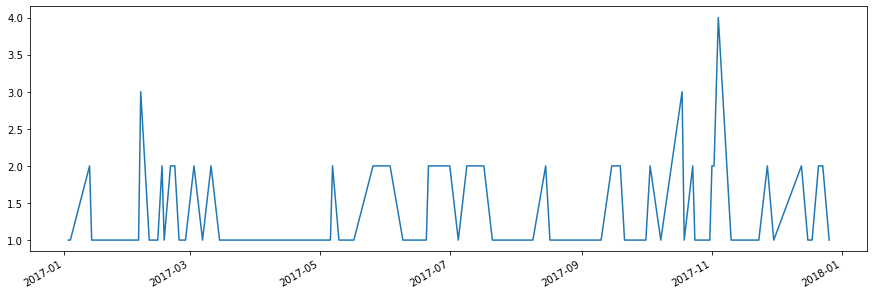

In [23]:
aux=df[df.Ano == 2017]
months = aux["FecNot"].value_counts().sort_index()

results = adfuller(months)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria\n\nDebido a que la serie de tiempo no es estacionaria se procede a transformarla:\n")
    months = months.diff().dropna()
    results = adfuller(months)
    print('Estadístico ADF: %f' % results[0])
    print('p-value: %f' % results[1])
    print('Valor crítico:')
    for key,value in results[4].items():
        print('\t%s: %.3f'% (key,value))
    
    if results[0] < results[4]["5%"] :
        print("Rechazo Ho: La serie de tiempo es estacionaria")
    else :
        print("Acepta Ho: La serie de tiempo no es estacionaria")
        
    months.plot(kind='bar')

months.plot(figsize=(15,5))

### 2018

Estadístico ADF: -6.743418
p-value: 0.000000
Valor crítico:
	1%: -3.654
	5%: -2.957
	10%: -2.618
Rechazo Ho: La serie de tiempo es estacionaria


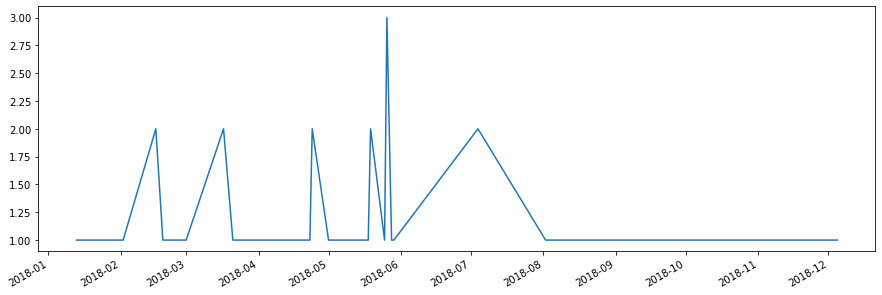

In [24]:
aux=df[df.Ano == 2018]
months = aux["FecNot"].value_counts().sort_index()

results = adfuller(months)
print('Estadístico ADF: %f' % results[0])
print('p-value: %f' % results[1])
print('Valor crítico:')
for key,value in results[4].items():
    print('\t%s: %.3f'% (key,value))
    
if results[0] < results[4]["5%"] :
    print("Rechazo Ho: La serie de tiempo es estacionaria")
else :
    print("Acepta Ho: La serie de tiempo no es estacionaria\n\nDebido a que la serie de tiempo no es estacionaria se procede a transformarla:\n")
    months = months.diff().dropna()
    results = adfuller(months)
    print('Estadístico ADF: %f' % results[0])
    print('p-value: %f' % results[1])
    print('Valor crítico:')
    for key,value in results[4].items():
        print('\t%s: %.3f'% (key,value))
    
    if results[0] < results[4]["5%"] :
        print("Rechazo Ho: La serie de tiempo es estacionaria")
    else :
        print("Acepta Ho: La serie de tiempo no es estacionaria")
        
    months.plot(kind='bar')

months.plot(figsize=(15,5))

### CONCLUSIÓN

_Todos los años son estacionarios por lo tanto se podrán emplear los modelos satisfactoriamente_

# ELECCIÓN DE LOS MODELOS

In [25]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

## AUTOREGRESSIVE MODEL - AR

### Entre 2010 a 2018

In [47]:
df2 = df[df.Ano.isin([2013, 2016])]
data_model = pd.DataFrame(df2['FecNot'].value_counts().sort_index())
data_model.columns = ['Casos']
data_model.index.name = 'Fecha'

data = pd.DataFrame(df['FecNot'].value_counts().sort_index())
data.columns = ['Casos']
data.index.name = 'Fecha'
X = data['Casos'].values

In [27]:
data['Values_shifted'] = data['Casos'].shift()

In [28]:
data = data.rename_axis('Fecha').reset_index()
data.head()

,Fecha,Casos,Values_shifted
0,2010-01-02,4,NaN
1,2010-01-03,7,4.0
2,2010-01-04,3,7.0
3,2010-01-05,2,3.0
4,2010-01-06,1,2.0


In [29]:
data.drop('Fecha', axis=1, inplace=True)
data.dropna(inplace=True)
data.head()

,Casos,Values_shifted
1,7,4.0
2,3,7.0
3,2,3.0
4,1,2.0
5,3,1.0


In [30]:
y = data.Casos.values
X = data.Values_shifted.values

In [31]:
train_size = int(len(X) * 0.80)

In [32]:
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

In [33]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
lr.coef_

array([0.30490983])

In [36]:
lr.intercept_

1.6025726267001392

In [37]:
y_pred = lr.predict(X_test)

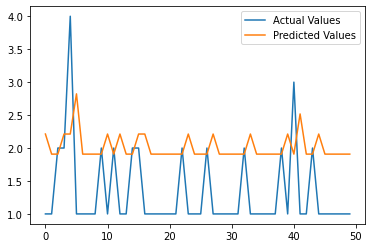

In [38]:
plt.plot(y_test[-50:], label="Actual Values")
plt.plot(y_pred[-50:], label="Predicted Values")
plt.legend()
plt.show()

In [39]:
y_pred[-1:]

array([1.90748246])

In [40]:
model = ARIMA(y_train, order=(1,0,0))

In [41]:
model_fit = model.fit()

In [42]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1108
Model:                     ARMA(1, 0)   Log Likelihood               -2218.995
Method:                       css-mle   S.D. of innovations              1.793
Date:                Sat, 17 Oct 2020   AIC                           4443.989
Time:                        11:24:30   BIC                           4459.020
Sample:                             0   HQIC                          4449.674
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3081      0.077     29.816      0.000       2.156       2.460
ar.L1.y        0.3045      0.029     10.616      0.000       0.248       0.361
                                    Roots           

In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt
expected = y_test[-277:]
predictions = y_pred[-277:]
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 1.414863


**Importando el archivo de pruebas (casos de dengue Buga 2019)**

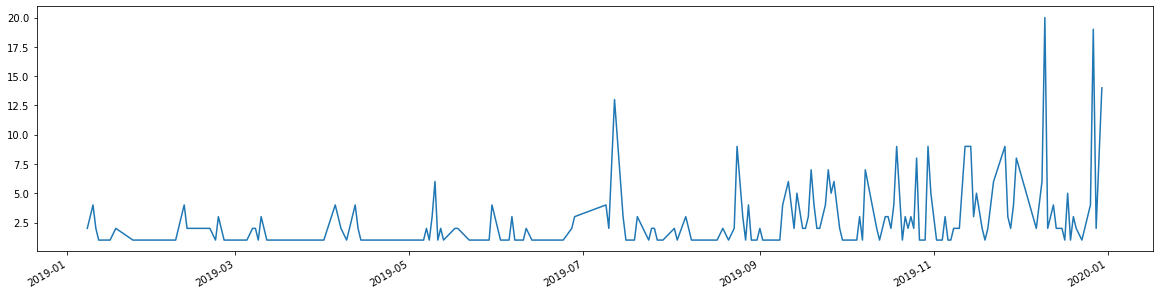

In [44]:
bugadata = pd.read_csv('../dengue_data/Buga2019.csv')
bugaTest = pd.DataFrame(bugadata)
bugaTest["FecNot"]=pd.to_datetime(bugaTest['FecNot'])
bugaTest.sort_values(["FecNot"])

aux=bugaTest[bugaTest.Ano == 2019]

test = aux['FecNot'].value_counts().sort_index()
h = pd.DataFrame(test)
h.columns = ['Casos']
h
test.plot(figsize=(20,5))

### Pruebas de autocorrelación

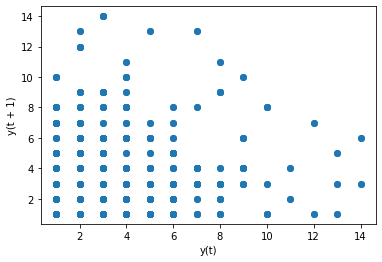

In [45]:
lag_plot(data)
plt.show()

In [48]:
values = DataFrame(data.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.304486
t+1  0.304486  1.000000


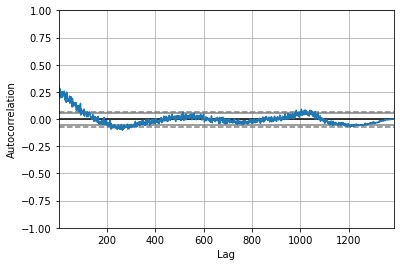

In [49]:
autocorrelation_plot(data)
plt.show()

### Predicciones por persistencia

Test MSE: 0.600


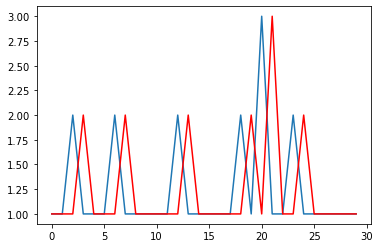

In [50]:
# create lagged dataset
values = DataFrame(data.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-30], X[len(X)-30:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# persistence model
def model_persistence(x):
    return x
 
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

### Predicciones de modelo AR fijo

Test RMSE: 0.635


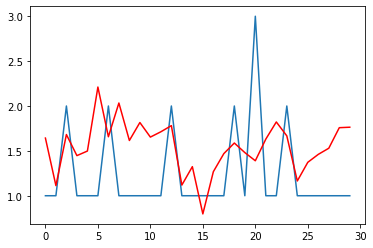

In [51]:
# split dataset
X = data.values
train, test = X[1:len(X)-30], X[len(X)-30:]
# train autoregressionc
model = AutoReg(train, lags=150)
model_fit = model.fit()

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

### Predicciones de modelo AR móvil

Test RMSE: 0.755


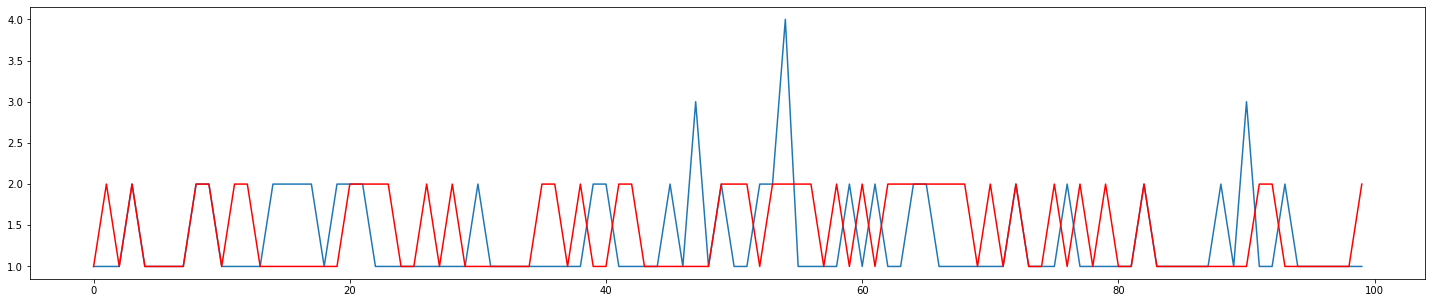

In [52]:
# split dataset
X = data.values
train, test = X[1:len(X)-100], X[len(X)-100:]
# train autoregression
window = 150
model = AutoReg(train, lags=150)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(np.round(yhat))
    history.append(obs)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.figure(figsize=(25,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## FASE 2 - Corrección de datos

**Asignar el valor cero a los datos que no se tengan registro**

In [53]:
import datetime
day_delta = datetime.timedelta(days=1)
    
start_date = datetime.date(2013, 1, 1)
end_date = datetime.date(2017, 1, 1)

list = []

for i in range((end_date - start_date).days):
    date = start_date + i*day_delta
    try: 
        list.append(data_model.at[date,'Casos'])
    except:  
        list.append(0)

In [54]:
final_model = pd.DataFrame(columns=('Fecha', 'Casos'))

for i in range((end_date - start_date).days):
    date = start_date + i*day_delta
    final_model.loc[len(final_model)]=[date, list[i]] 

In [55]:
final_model

,Fecha,Casos
0,2013-01-01,0
1,2013-01-02,0
2,2013-01-03,1
3,2013-01-04,0
4,2013-01-05,0
...,...,...
1456,2016-12-27,0
1457,2016-12-28,0
1458,2016-12-29,2
1459,2016-12-30,0


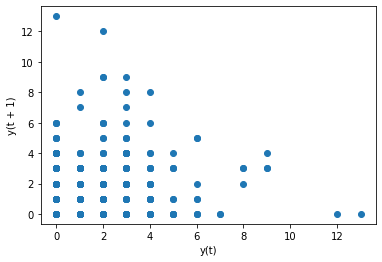

In [56]:
final_data = final_model.set_index('Fecha')
lag_plot(final_data)
plt.show()

In [57]:
values = DataFrame(final_data.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

Empty DataFrame
Columns: []
Index: []


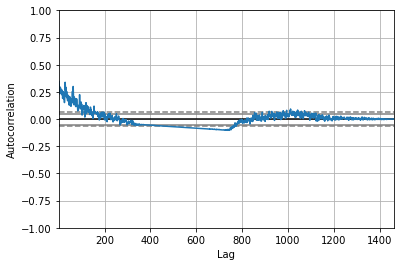

In [58]:
autocorrelation_plot(final_data)
plt.show()

### Predicciones de modelo AR móvil

Test RMSE: 1.342


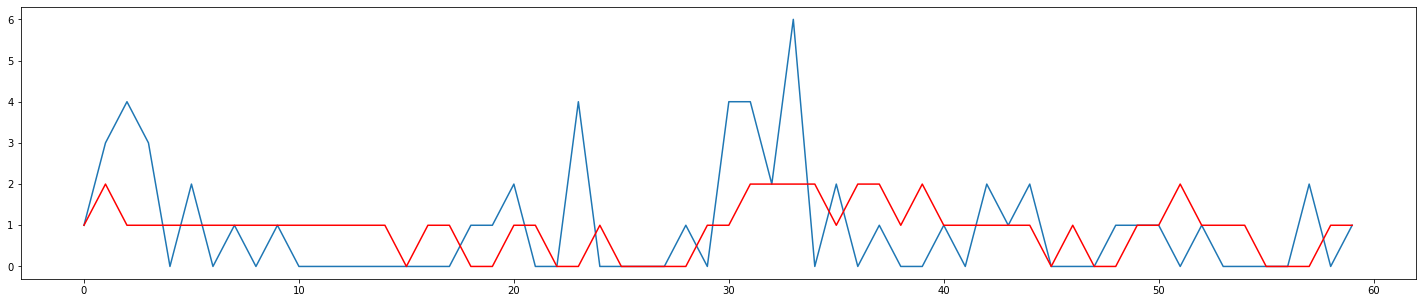

In [59]:
# split dataset
X = final_data.values
train, test = X[1:len(X)-60], X[len(X)-60:]
# train autoregression
window = 50
model = AutoReg(train, lags=window)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = []
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    yhat2 = float(yhat)
    predictions.append(np.round(yhat2))
    history.append(obs)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.figure(figsize=(25,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

### FASE 3 - Corrección del modelo

In [ ]:
def month_average(month_data) :
    days_amount = 0
    accumulated = 0
    for date, case_number in month_data:
        accumulated += case_number
        days_amount += 1
    return round(accumulated/days_amount)

In [ ]:
def assign_average(average, month_data) :
    for date, case_number in month_data :
        if case_number == 0 :
            month.replace()

In [ ]:
day_delta = datetime.timedelta(days=1)
    
start_date = datetime.date(2013, 1, 1)
end_date = datetime.date(2017, 1, 1)

list = []

for i in range((end_date - start_date).days):
    date = start_date + i*day_delta
    try: 
        list.append(data_model.at[date,'Casos'])
    except:  
        list.append(0)

## Series temporales para los barrios entre 2013 y 2016

In [60]:
df2

,Id,MesOcurrencia,FecNot,Semana,Ano,Edad,GrupoEdad,Sexo,Barrio,Comuna
864,1124,diciembre,2013-01-25,51,2013,10,5 - 14,M,EL CARMELO,6
884,1147,marzo,2013-05-03,10,2013,45,45 - 60,M,LA HONDA,5
885,1148,marzo,2013-12-03,10,2013,9,5 - 14,F,FRANCISCO RIVERA ESCOBAR,5
886,1149,marzo,2013-03-17,11,2013,48,45 - 60,F,LA CONCORDIA,3
887,1150,marzo,2013-03-16,11,2013,3,1 - 4,M,SANTA BARBARA,2
...,...,...,...,...,...,...,...,...,...,...
2856,53013,agosto,2016-08-18,32,2016,61,> 60,F,DIVINO NINO,3
2857,53014,diciembre,2016-07-12,48,2016,8,5 - 14,M,JOSE MARIA CABAL,4
2858,53015,diciembre,2016-12-12,49,2016,17,15 - 44,F,SANTA BARBARA,2
2859,53016,diciembre,2016-12-15,49,2016,10,5 - 14,M,PALOBLANCO,3


In [75]:
def stationarity_analysis_nb(nb_df, name):
    results = adfuller(nb_df)
    print('Estadístico ADF: %f' % results[0])
    print('p-value: %f' % results[1])
    print('Valor crítico:')
    for key,value in results[4].items():
        print('\t%s: %.3f'% (key,value))

    if results[0] < results[4]["5%"] :
        print("Rechazo Ho: La serie de tiempo es estacionaria")
        nb_df.plot(kind='line', figsize=(30,5))
        plt.title(name)  
        plt.ylabel("Número de casos")    
    else :
        print("Acepta Ho: La serie de tiempo no es estacionaria\n\nDebido a que la serie de tiempo no es estacionaria se procede a transformarla:\n")
        nb_df = nb_df.diff().dropna()
        results = adfuller(nb_df)
        print('Estadístico ADF: %f' % results[0])
        print('p-value: %f' % results[1])
        print('Valor crítico:')
        for key,value in results[4].items():
            print('\t%s: %.3f'% (key,value))

        if results[0] < results[4]["5%"] :
            print("Rechazo Ho: La serie de tiempo es estacionaria")
        else :
            print("Acepta Ho: La serie de tiempo no es estacionaria")

        nb_df.plot(kind='bar')

In [62]:
def assign_zeros(nb_df) :
    day_delta = datetime.timedelta(days=1)
    start_date = datetime.date(2013, 1, 1)
    end_date = datetime.date(2017, 1, 1)

    list = []

    for i in range((end_date - start_date).days):
        date = start_date + i*day_delta
        try: 
            list.append(nb_df.at[date,'Casos'])
        except:  
            list.append(0)
            
    final_model = pd.DataFrame(columns=('Fecha', 'Casos'))

    for i in range((end_date - start_date).days):
        date = start_date + i*day_delta
        final_model.loc[len(final_model)]=[date, list[i]]
        
    return final_model

In [ ]:
neighborhoods_df = df2['Barrio'].value_counts().sort_index()

for neighborhood_name in neighborhoods_df.index :
    nb_df = df2[df2.Barrio == neighborhood_name]
    h = pd.DataFrame(nb_df['FecNot'].value_counts().sort_index())
    h.columns = ['Casos']
    h.index.name = 'Fecha'
    df_zeros = assign_zeros(h)
    df_zeros.set_index('Fecha',inplace=True)
    stationarity_analysis_nb(df_zeros,neighborhood_name)

Estadístico ADF: -9.571270
p-value: 0.000000
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es estacionaria
Estadístico ADF: -5.704352
p-value: 0.000001
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es estacionaria
Estadístico ADF: -7.810171
p-value: 0.000000
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es estacionaria
Estadístico ADF: -16.838208
p-value: 0.000000
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es estacionaria
Estadístico ADF: -6.227042
p-value: 0.000000
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es estacionaria
Estadístico ADF: -5.936882
p-value: 0.000000
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es estacionaria
Estadístico ADF: -36.547621
p-value: 0.000000
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es est